In [2]:
import kraken
from kraken import pageseg
from PIL import Image
from pdf2image import convert_from_path
import os
from PIL import ImageDraw

In [3]:
images = convert_from_path('Mozilla-Trustworthy_AI.pdf',poppler_path=r'C:\poppler-0.68.0\bin',output_folder=r'D:\PYB-Test\Test\Kraken')

In [4]:
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B689C670>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B689C6A0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B689C730>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B689C700>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B689C6D0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B690B6D0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B690BF70>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B690B400>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B6915670>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B6915850>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B6915880>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x200B69158B0>,
 <PI

In [5]:
for i in range(len(images)):
    images[i].save('page'+ str(i) +'.png', 'PNG')

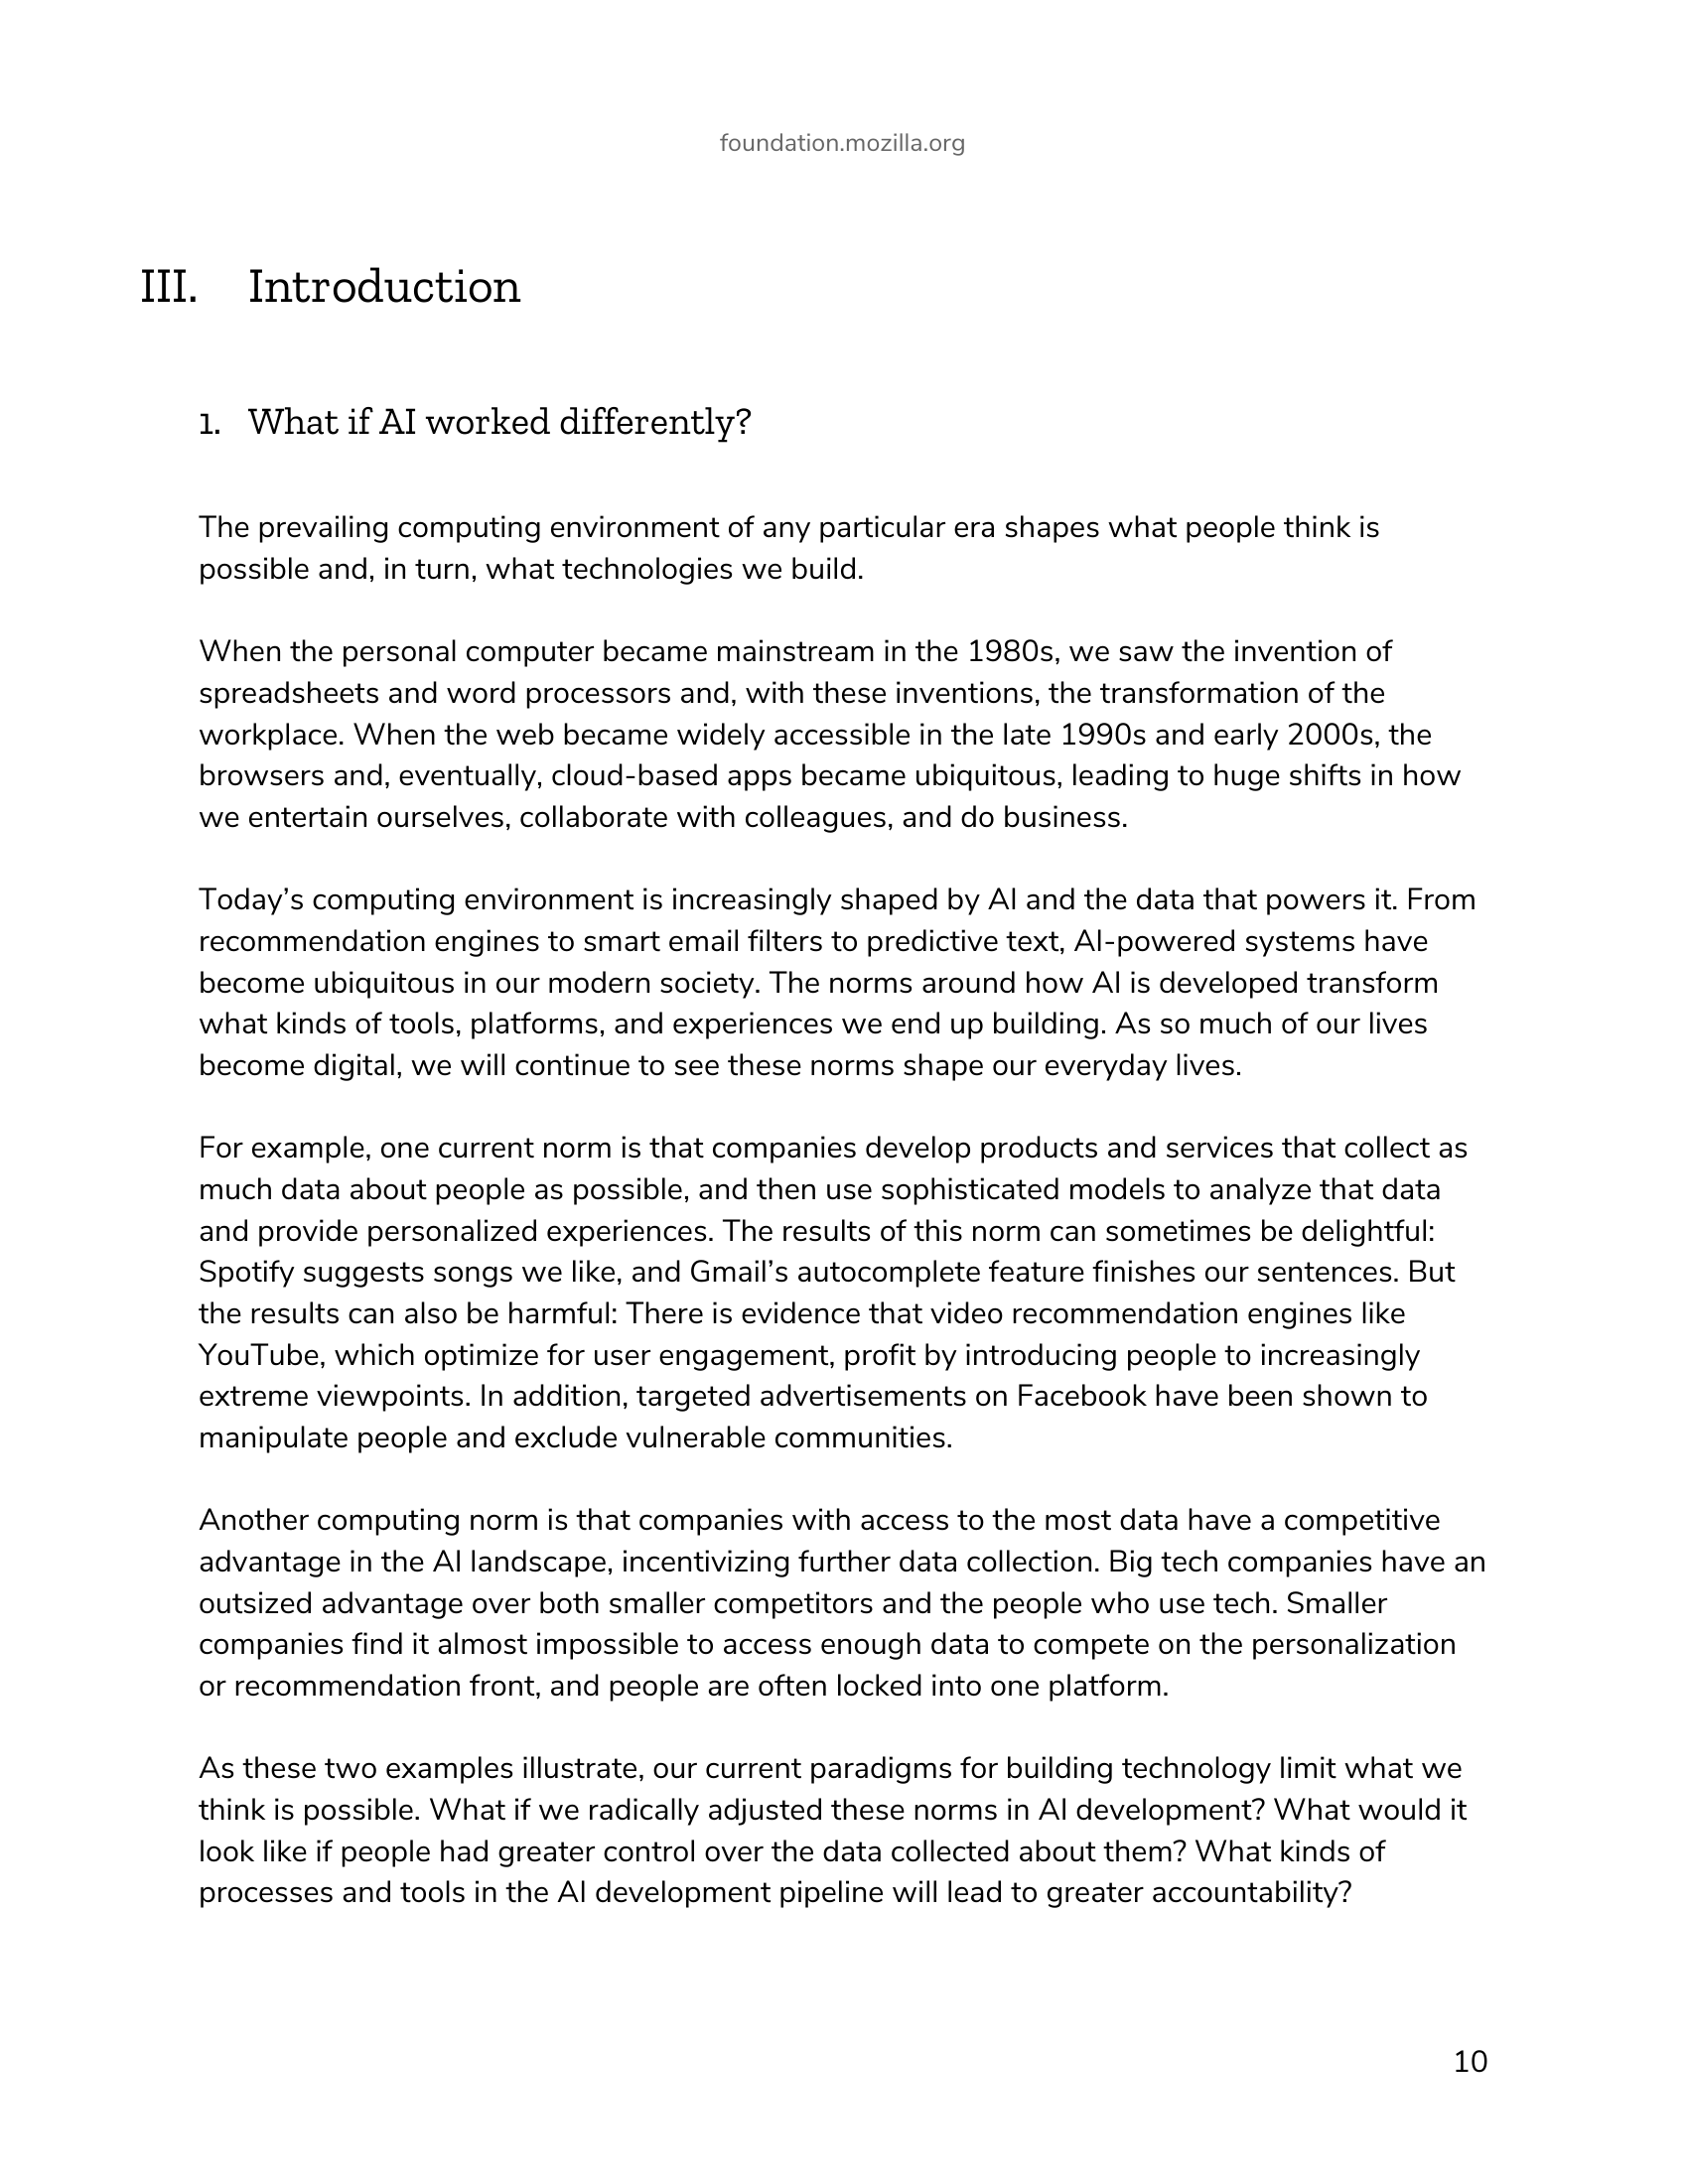

In [6]:
img = Image.open('page9.png')
img

In [7]:
bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
print(bounding_boxes)

[[142, 271, 186, 288], [142, 288, 196, 304], [251, 269, 520, 294], [201, 410, 755, 446], [199, 519, 1388, 547], [201, 561, 867, 589], [200, 644, 1402, 672], [201, 686, 1393, 714], [200, 728, 1440, 756], [201, 769, 1470, 797], [200, 811, 1133, 839], [199, 894, 1484, 922], [201, 936, 1436, 964], [201, 978, 1446, 1006], [200, 1019, 1436, 1047], [201, 1061, 1248, 1089], [201, 1144, 1476, 1172], [201, 1186, 1449, 1214], [201, 1228, 1442, 1256], [201, 1269, 1464, 1297], [199, 1311, 1414, 1339], [199, 1353, 1429, 1381], [200, 1394, 1436, 1422], [201, 1436, 957, 1464], [200, 1519, 1449, 1547], [201, 1561, 1494, 1589], [200, 1603, 1396, 1631], [200, 1644, 1464, 1672], [200, 1686, 1175, 1714], [200, 1769, 1471, 1797], [199, 1811, 1476, 1839], [201, 1853, 1395, 1881], [201, 1894, 1360, 1922], [1465, 2065, 1497, 2087]]


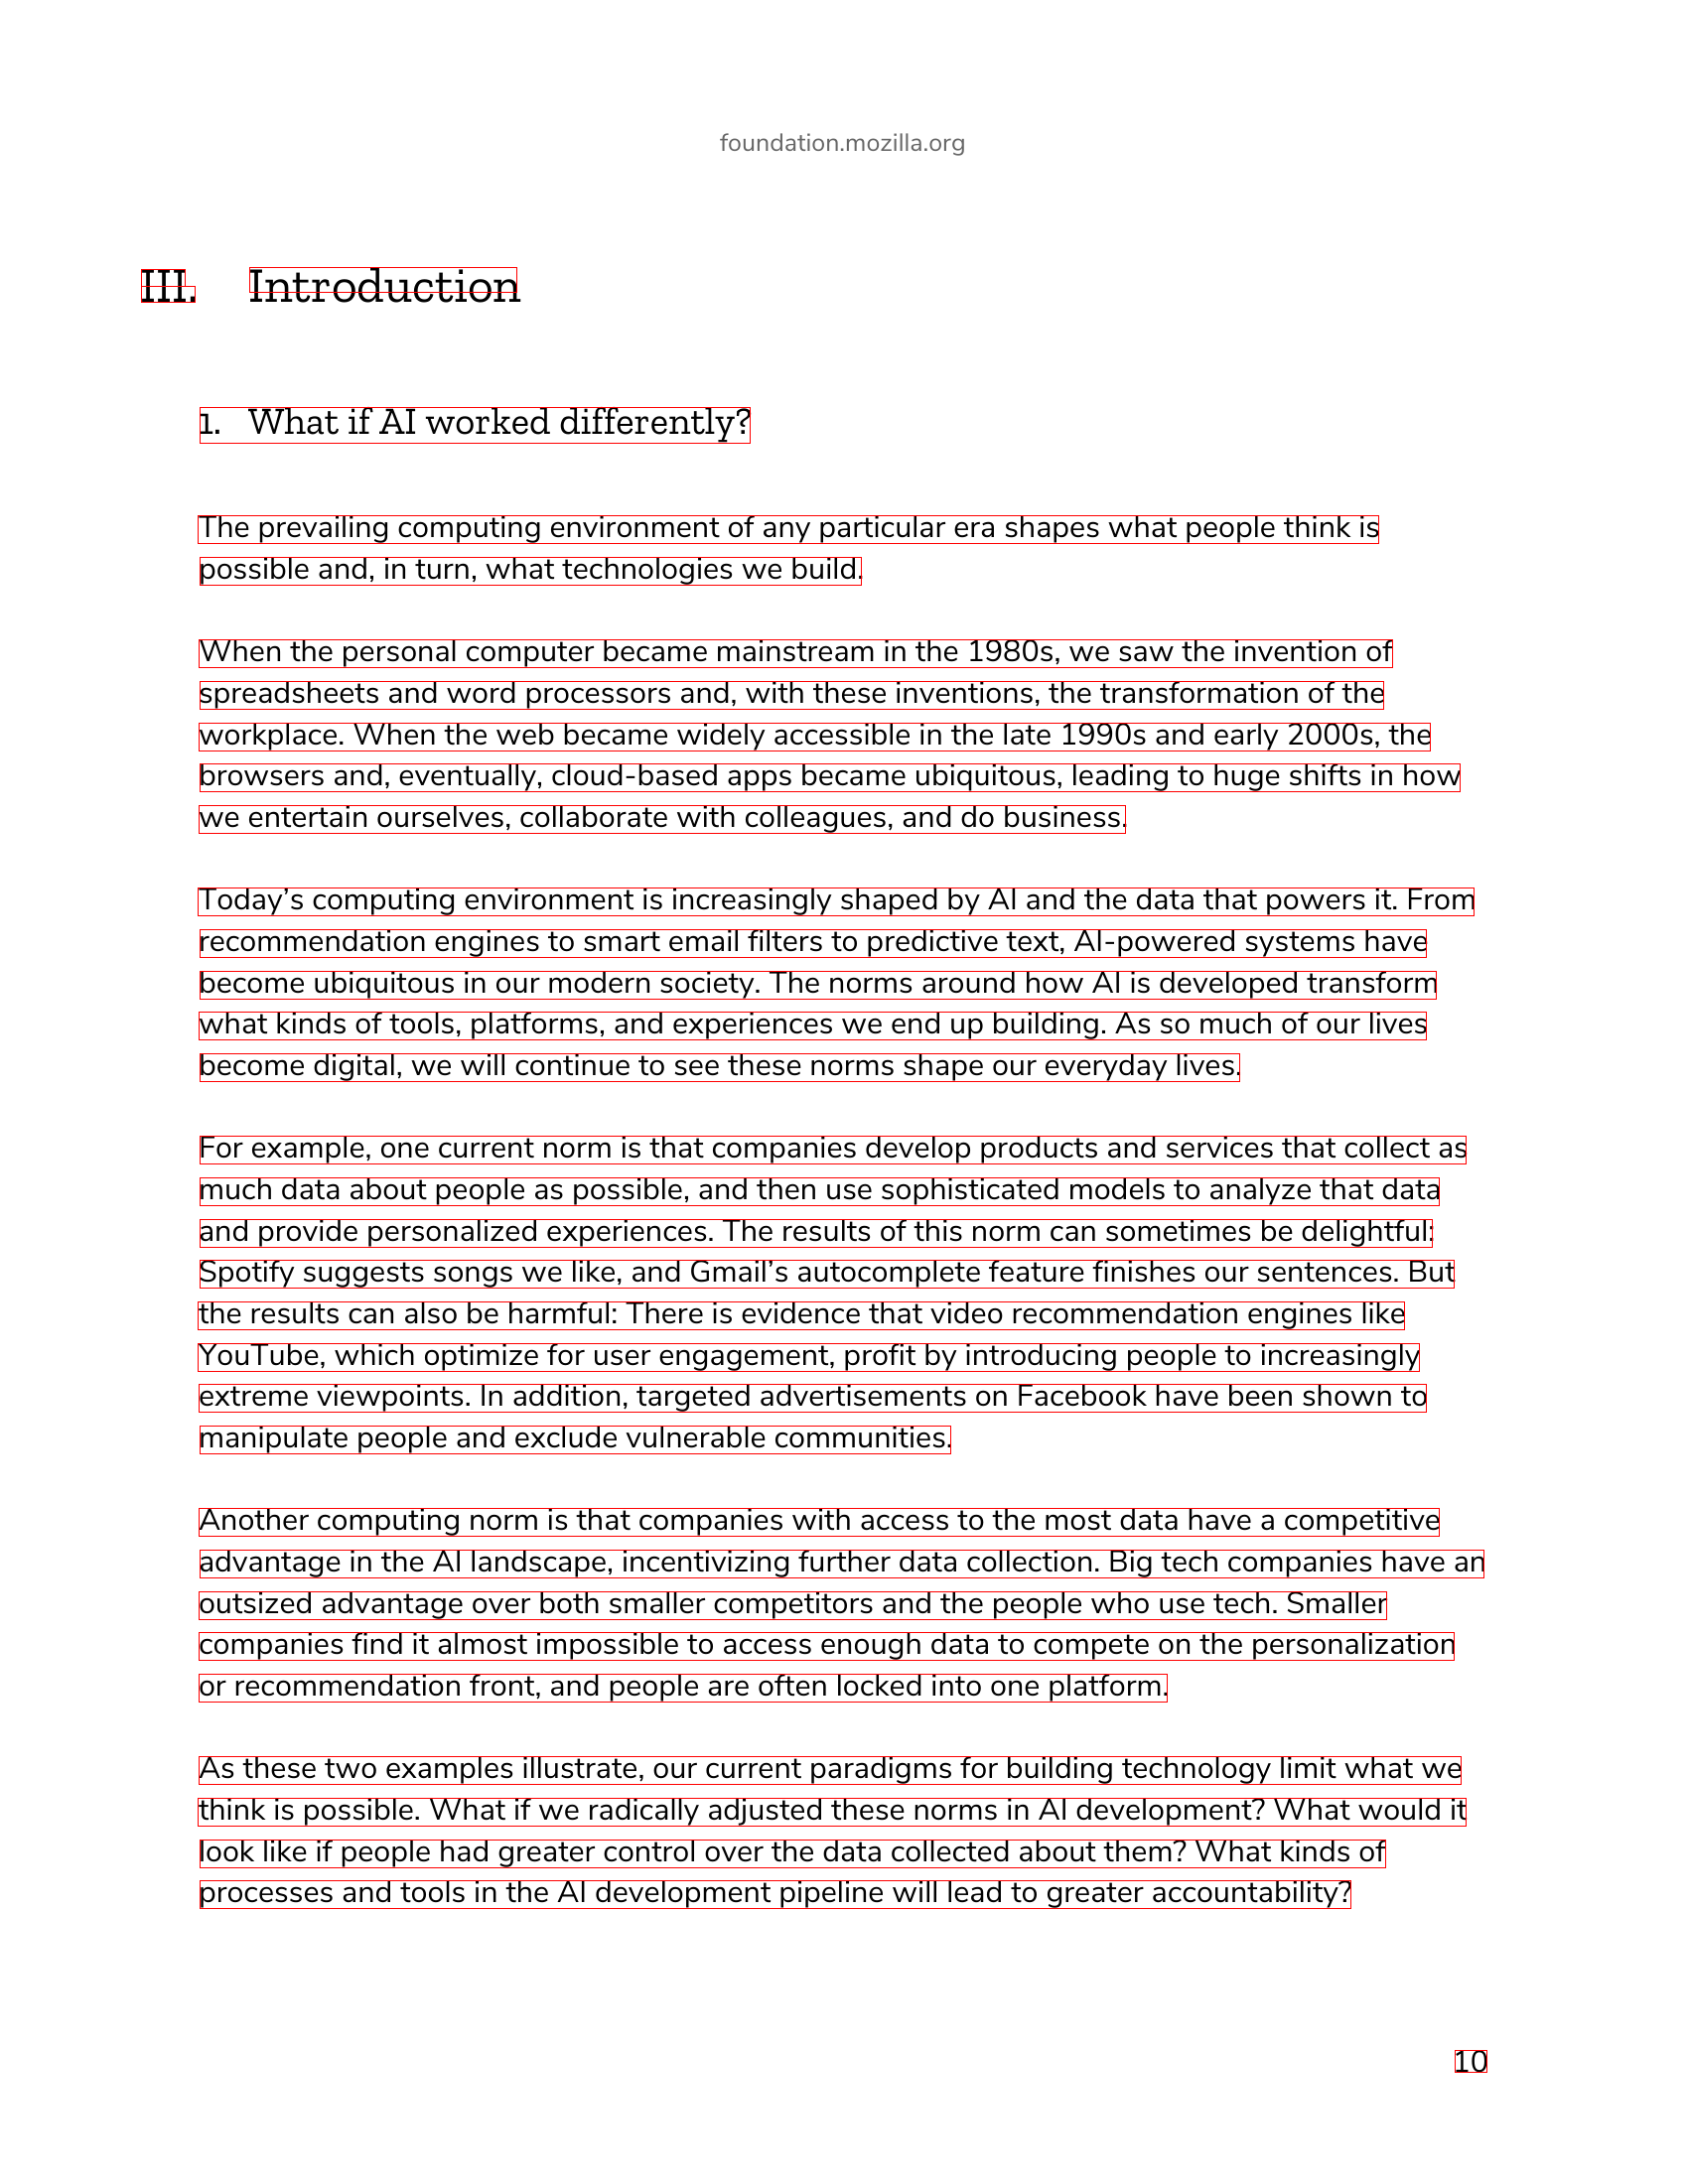

In [9]:
def show_boxes(img):
    # param img is a PIL.Image Object
    # return is and image 
    
    from PIL import ImageDraw
    # to draw bounding boxes
    drawing_object = ImageDraw.Draw(img)
    # drawing bounding boxes using pageseg
    bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
    
    for box in bounding_boxes:
        drawing_object.rectangle(box, fill = None, outline='red')
        
    return img

img = Image.open('page9.png')
display(show_boxes(img))

In [11]:
list_of_h = []
def calculate_line_height(img):
    # param PIL.Image Object
    # return average height in px
    
    bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
    # boxes have values in tuples in the format (top, left, bottom, right)
    # hieght can be measured as top - bottom
    
    height_acc = 0
    for box in bounding_boxes:
        curr_line_h = (box[3] - box[1])
        height_acc = height_acc + curr_line_h
        list_of_h.append(curr_line_h)
        
    return int(height_acc/len(bounding_boxes))

img = Image.open('page9.png')
line_height = calculate_line_height(img)
print(line_height)

27


In [12]:
list_of_h

[17,
 16,
 25,
 36,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 22]

In [13]:
max_num = max(list_of_h)
max_num

36

In [14]:
min_num = min(list_of_h)
min_num

16